In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
chessBoards = []
chessBoards.append(cv2.imread('chess1.jpg'))
chessBoards.append(cv2.imread('chess2.jpg'))
chessBoards.append(cv2.imread('chess3.jpg'))
chessBoards.append(cv2.imread('chess4.jpg'))
chessBoards.append(cv2.imread('chess5.jpg'))
chessBoards.append(cv2.imread('chess6.jpg'))
chessBoards.append(cv2.imread('chess7.jpg'))
chessBoards.append(cv2.imread('chess8.jpg'))

True


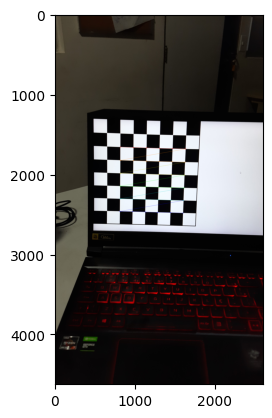

True


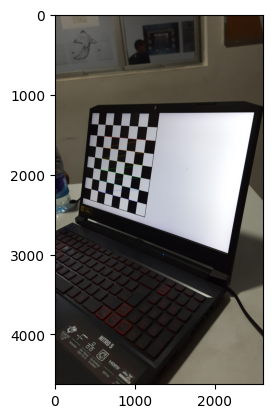

True


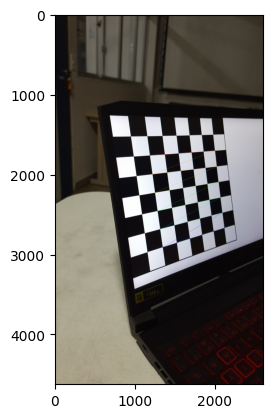

True


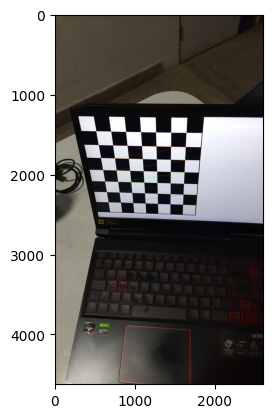

True


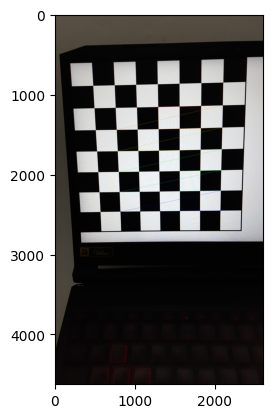

True


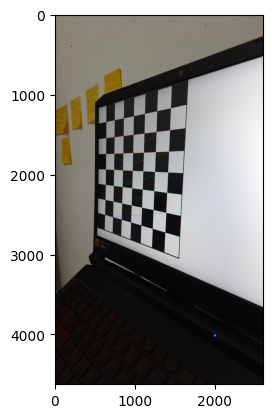

True


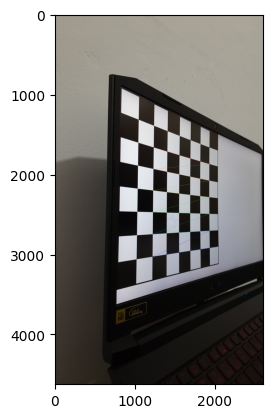

True


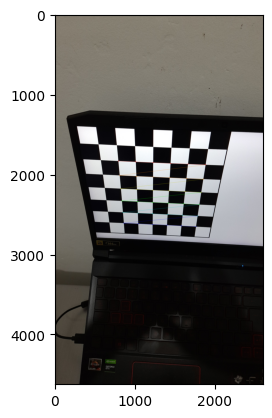

In [3]:
objp = np.zeros((6*6, 3), np.float32)
objp[:, :2] = np.mgrid[0:6, 0:6].T.reshape(-1, 2) * 25

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# plt.figure(figsize=(30,20))

for i, img in enumerate(chessBoards):
  # img = cv2.imread(data_path + "data/" + img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # plt.imshow(gray, cmap='gray')
  # plt.show()

  # Find the chess board corners
  ret, corners = cv2.findChessboardCorners(gray, (6,6), None)
  print(ret)
  # If found, add object points, image points (after refining them)
  if ret == True:
    objpoints.append(objp)

    # refine corners computation
    # corners2 =  cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), (CV_TERMCRIT_EPS + CV_TERMCRIT_ITER, 30, 0.1));
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1));
    imgpoints.append(corners2)

    # Draw and display the corners
    corners_img = cv2.drawChessboardCorners(img, (6,6), corners2, ret)
    # plt.subplot(2, 3, i+1)
    # cv2_imshow(corners_img)
    corners_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(corners_img)
    plt.show()
    # plt.axis("off")

plt.show()

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("intrinsic matrix: \n", mtx)

# ret, camera_matrix_left, dist_coeff_left, camera_matrix_right, dist_coeff_right, R, T, E, F = cv2.stereoCalibrate(
#     objpoints, imgpoints_left, imgpoints_right, None, None, None, None, gray_left.shape[::-1], criteria=criteria, flags=flags)


intrinsic matrix: 
 [[3.35336985e+03 0.00000000e+00 1.30829818e+03]
 [0.00000000e+00 3.35377078e+03 2.34684700e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [5]:
# np.save('camera_matrix.npy', mtx)
# np.save('dist_coeff_left.npy', dist_coeff_left)
# np.save('camera_matrix_right.npy', camera_matrix_right)
# np.save('dist_coeff_right.npy', dist_coeff_right)
# np.save('R.npy', R)
# np.save('T.npy', T)

np.save('camera_matrix.npy', mtx)
np.save('dist_coeff.npy', dist)
np.save('rvecs.npy', rvecs)
np.save('tvecs.npy', tvecs)